<a href="https://colab.research.google.com/github/TerekliTahaBerk/data-science-portfolio/blob/main/Diet%2C%20Exercise%2C%20and%20PCOS%20Insights%20Prediction/Diet%2C_Exercise%2C_and_PCOS_Insights_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diet, Exercise, and PCOS Insights Data Analysis

---



The primary purpose of this dataset is to facilitate research and analysis on the impact of lifestyle choices on PCOS. It is designed for:

- Exploratory Data Analysis (EDA): Understanding trends, correlations, and patterns in the data.
- Predictive Modeling: Building machine learning models to predict PCOS based on health metrics.
- Health Research: Supporting studies on how diet, exercise, and stress levels contribute to PCOS prevalence.
- Awareness:Educating individuals and healthcare providers about the importance of lifestyle in managing reproductive health.

In [ ]:
import pandas as pd
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('/content/Cleaned-Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         173 non-null    object 
 1   Weight_kg                   173 non-null    float64
 2   Height_ft                   173 non-null    float64
 3   Marital_Status              173 non-null    object 
 4   PCOS                        173 non-null    object 
 5   Family_History_PCOS         173 non-null    object 
 6   Menstrual_Irregularity      173 non-null    object 
 7   Hormonal_Imbalance          173 non-null    object 
 8   Hyperandrogenism            173 non-null    object 
 9   Hirsutism                   173 non-null    object 
 10  Mental_Health               173 non-null    object 
 11  Conception_Difficulty       173 non-null    object 
 12  Insulin_Resistance          173 non-null    object 
 13  Diabetes                    173 non

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")

# 1. Basic statistics
df.describe()

,Weight_kg,Height_ft,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,Diet_Fried_Food,Diet_Tea_Coffee,Diet_Multivitamin
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,56.549711,160.636647,5.445087,3.647399,3.034682,3.439306,3.069364,2.450867,4.531792,3.618497,3.179191,4.549133,1.393064
std,12.025369,7.287373,2.116832,2.548930,2.048527,1.769596,1.857054,1.709808,2.293919,2.255253,2.019448,2.785795,2.326880
min,36.000000,124.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,157.480000,4.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,55.000000,160.020000,7.000000,3.000000,3.000000,3.000000,3.000000,2.000000,5.000000,3.000000,3.000000,6.000000,0.000000
75%,64.000000,165.100000,7.000000,7.000000,4.000000,5.000000,4.000000,3.000000,7.000000,6.000000,5.000000,7.000000,2.000000
max,115.000000,182.880000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


## Conducts a pattern-driven Exploratory Data Analysis (EDA)

---



## Correlation Heatmap of Numerical Variables

This heatmap visualizes the correlation coefficients between various numerical variables in the dataset. Each cell displays the Pearson correlation coefficient, with colors ranging from light yellow (low correlation) to dark blue (high correlation). The heatmap allows us to identify relationships between variables at a glance.

### Key Observations:
1. **High Correlations:**
   - `Diet_Starchy_Vegetables` and `Diet_NonStarchy_Vegetables` exhibit a strong positive correlation (0.65).
   - `Diet_Vegetables` has a notable correlation with both `Diet_Starchy_Vegetables` (0.54) and `Diet_NonStarchy_Vegetables` (0.57).

2. **Low Correlations:**
   - `Weight_kg` and `Diet_Bread_Cereals` have a weak negative correlation (-0.07).
   - `Height_ft` and `Diet_Tea_Coffee` show little to no correlation (0.08).

3. **Isolated Variable:**
   - `Diet_Multivitamin` shows minimal correlation with other variables, suggesting it might be an independent factor.

This heatmap provides insights into dietary patterns and their potential relationship with physical attributes (e.g., weight and height).

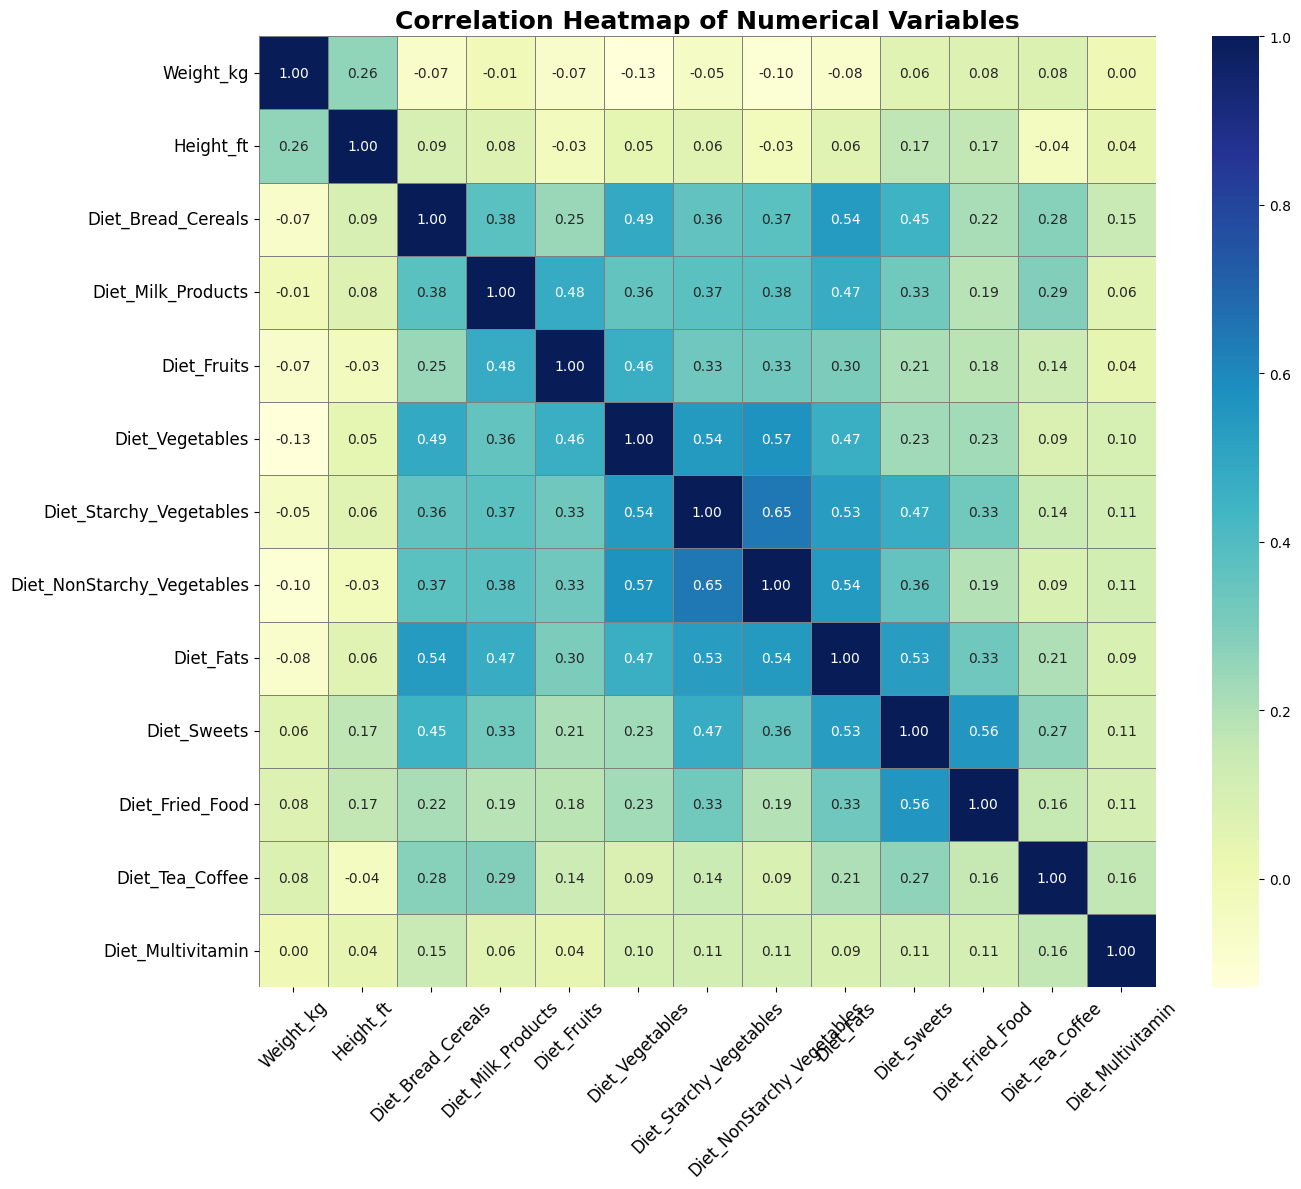

In [ ]:
# Correlation Heatmap
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 12))  # Bigger figure for better readability
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",  # Limit decimal points
    cmap='YlGnBu',  # Softer color palette
    annot_kws={"size": 10},  # Smaller annotations
    linewidths=0.5,  # Add gridlines for better separation
    linecolor='gray'
)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to fit elements better
plt.show()

## Distribution of PCOS in Survey Population

This pie chart visualizes the distribution of PCOS (Polycystic Ovary Syndrome) cases among survey participants. The visualization uses a color-coded system with pink, blue, and green segments to represent different PCOS status categories, allowing for quick interpretation of the prevalence rates.

### Key Observations:

1. **No PCOS Cases:**
   - A substantial majority (77.5%) of participants report no PCOS
   - This represents the baseline population without the condition

2. **Confirmed PCOS Cases:**
   - Diagnosed cases comprise 22.0% of the total sample
   - This indicates a significant prevalence of medically confirmed PCOS

3. **Potential Undiagnosed Cases:**
   - A small fraction (0.6%) report symptoms without medical diagnosis
   - This suggests possible gaps in medical access or diagnosis

### Clinical Significance:
- The distribution shows that approximately one in five participants has diagnosed PCOS
- The low percentage of undiagnosed cases suggests good medical awareness
- The overall distribution aligns with typical PCOS prevalence rates in population studies

This visualization effectively captures the PCOS distribution pattern and highlights the importance of medical diagnosis in identifying and managing the condition.

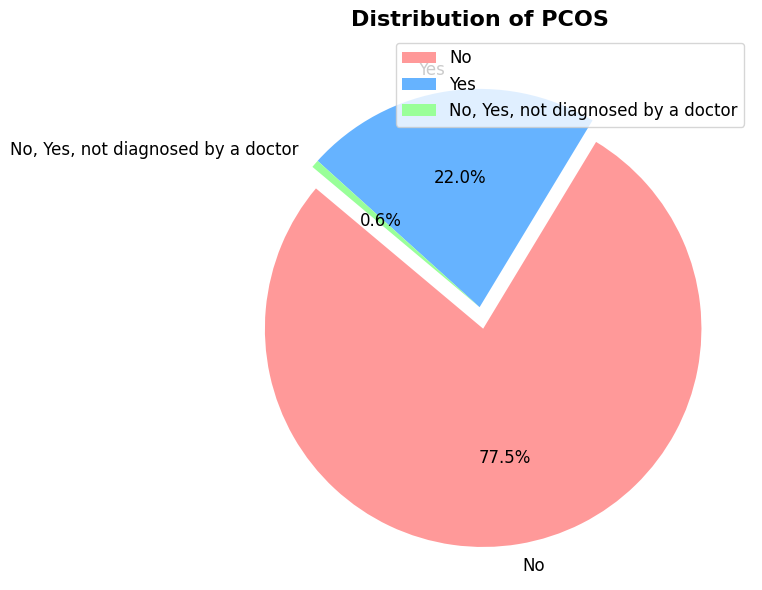

In [ ]:
# Improved Distribution of PCOS Pie Chart with Fix
plt.figure(figsize=(8, 6))

# Color palette
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Adjust for multiple categories

# Value counts and categories
value_counts = df['PCOS'].value_counts()

# Explode adjusted for the number of slices
explode = [0.1 if i == 0 else 0 for i in range(len(value_counts))]  # Explode only the first slice

# Create pie chart
value_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,  # Start angle for better alignment
    colors=colors[:len(value_counts)],  # Match colors to category count
    explode=explode,
    textprops={'fontsize': 12}  # Font size for percentages
)

plt.title('Distribution of PCOS', fontsize=16, fontweight='bold')  # Enhanced title
plt.ylabel('')  # Remove default ylabel for a cleaner look
plt.legend(value_counts.index, loc='upper right', fontsize=12)  # Add legend dynamically
plt.tight_layout()  # Adjust layout for better fit
plt.show()

## Age Distribution Analysis in Survey Population

This histogram with a density curve visualizes the age distribution of survey participants, showing both the frequency of age groups and the overall age pattern. The visualization combines bar charts with a smoothed curve overlay to represent the age distribution effectively.

### Key Observations:

1. **Peak Age Group:**
   - The 20-25 age bracket shows the highest frequency (~100 participants)
   - This indicates a predominantly young adult population in the survey

2. **Secondary Concentration:**
   - Less than 20 age group represents the second-largest segment (~57 participants)
   - Suggests significant participation from adolescents and young adults

3. **Age Distribution Pattern:**
   - Sharp decline in participation after age 25
   - Minimal representation in age groups above 45
   - Very low frequencies in the 30-35 and 35-44 age ranges

### Demographic Implications:
- The distribution is strongly skewed towards younger participants
- The majority of the survey population falls within the 15-25 age range
- Limited representation of middle-aged and older participants
- The data suggests this study primarily captures youth perspectives

This visualization effectively highlights the age composition of the survey population, showing a clear focus on younger demographic groups and declining participation with increasing age.

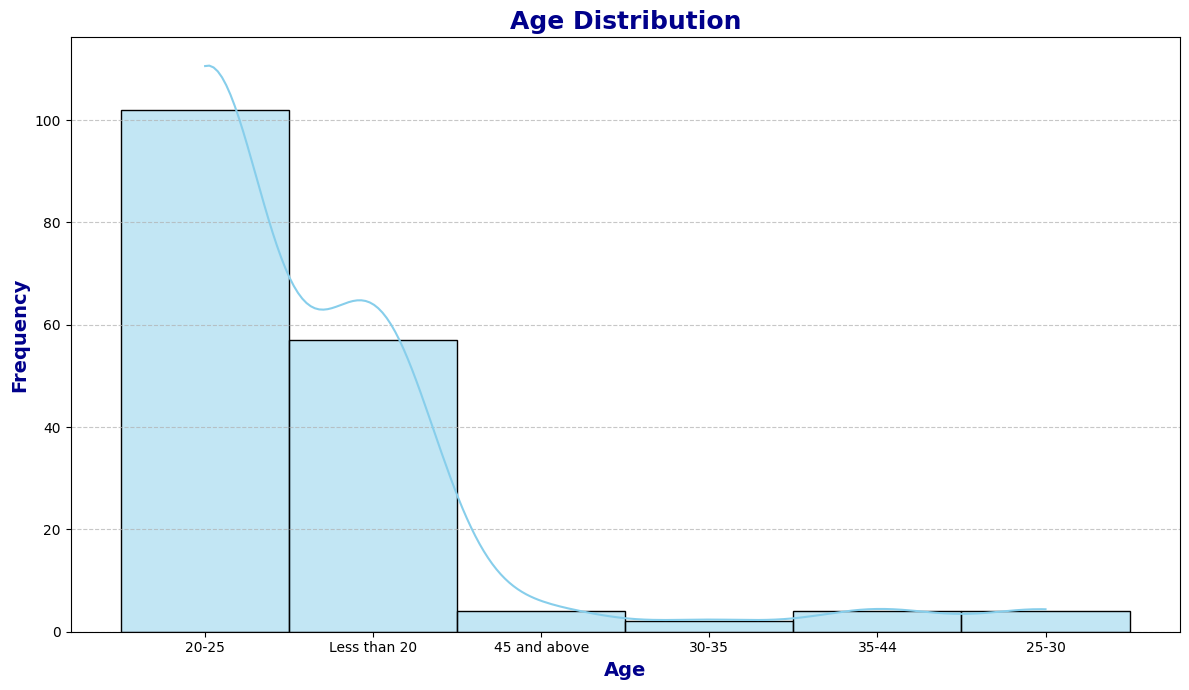

In [ ]:
# Improved Age Distribution Plot
plt.figure(figsize=(12, 7))  # Larger figure for better readability
sns.histplot(
    df['Age'],
    kde=True,
    color='skyblue',  # Softer color for better aesthetics
    bins=20  # Increased bins for more detailed distribution
)

# Customizing the title and labels
plt.title('Age Distribution', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Age', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkblue')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout for better fit
plt.show()

## BMI Distribution Analysis in Survey Population

This histogram with a density curve visualizes the Body Mass Index (BMI) distribution among survey participants, combining bar charts with a smoothed curve overlay to represent the BMI pattern effectively.

### Key Observations:

1. **Distribution Peak:**
   - Highest frequency occurs around BMI 0.020-0.022
   - Shows a clear central tendency in the population's BMI range
   - Distribution appears roughly normal with a slight right skew

2. **Range Analysis:**
   - BMI values primarily concentrated between 0.015 and 0.035
   - Notable decline in frequency beyond BMI 0.035
   - Few outliers present in the higher BMI range (around 0.045)

3. **Distribution Pattern:**
   - Relatively symmetric around the peak
   - Gradual decline on both sides of the peak
   - Small secondary peaks observed around 0.035

### Clinical Implications:
- The majority of participants fall within a narrow BMI range
- Distribution suggests a relatively homogeneous study population
- Presence of outliers indicates some cases of higher BMI values
- The pattern indicates most participants have similar body mass characteristics

This visualization effectively captures the BMI distribution pattern in the survey population, highlighting both the central tendency and the variation in body mass index among participants.

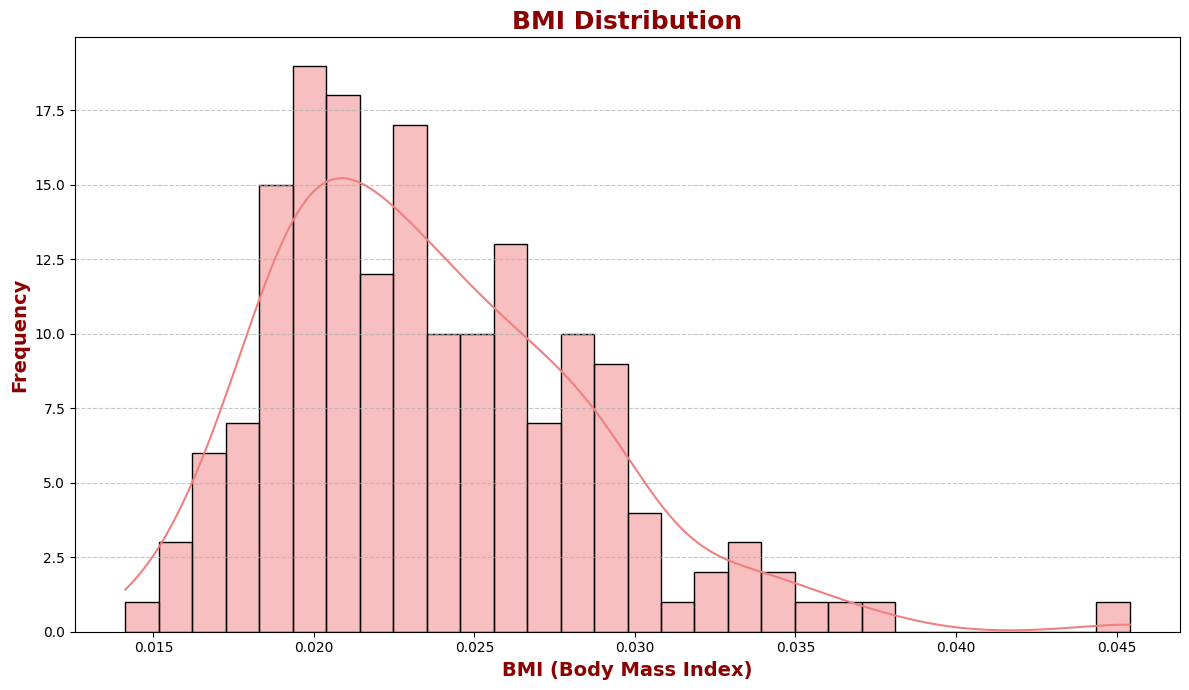

In [ ]:
# Calculate BMI
df['BMI'] = df['Weight_kg'] / ((df['Height_ft'] * 0.3048) ** 2)

# Plot the BMI distribution
plt.figure(figsize=(12, 7))
sns.histplot(
    df['BMI'],
    kde=True,
    color='lightcoral',  # Enhanced color
    bins=30  # Increased bin count for detailed distribution
)

# Add title and labels
plt.title('BMI Distribution', fontsize=18, fontweight='bold', color='darkred')
plt.xlabel('BMI (Body Mass Index)', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkred')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

plt.show()

## Relationship Analysis Between BMI and PCOS Status

This box plot visualization illustrates the relationship between Body Mass Index (BMI) and Polycystic Ovary Syndrome (PCOS) status among survey participants, providing insights into potential associations between these health metrics.

### Key Observations:

1. **PCOS Positive Group:**
   - Higher median BMI compared to non-PCOS group
   - Wider interquartile range indicating greater BMI variability
   - Several outliers present in upper BMI range

2. **PCOS Negative Group:**
   - Lower median BMI overall
   - More compact interquartile range suggesting less BMI variation
   - Few outliers in both upper and lower BMI ranges

3. **Undiagnosed Symptoms Group:**
   - Limited data points available
   - Appears to have intermediate BMI values
   - Narrow range possibly due to small sample size

### Clinical Implications:
- Clear BMI differentiation between PCOS and non-PCOS groups
- Suggests potential correlation between higher BMI and PCOS presence
- Distribution patterns indicate BMI might be a relevant factor in PCOS
- Results support known associations between BMI and PCOS in medical literature

This visualization effectively demonstrates the BMI differences across PCOS status categories, highlighting potential relationships between body mass and PCOS diagnosis.

<ipython-input-23-5905ddbad94f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


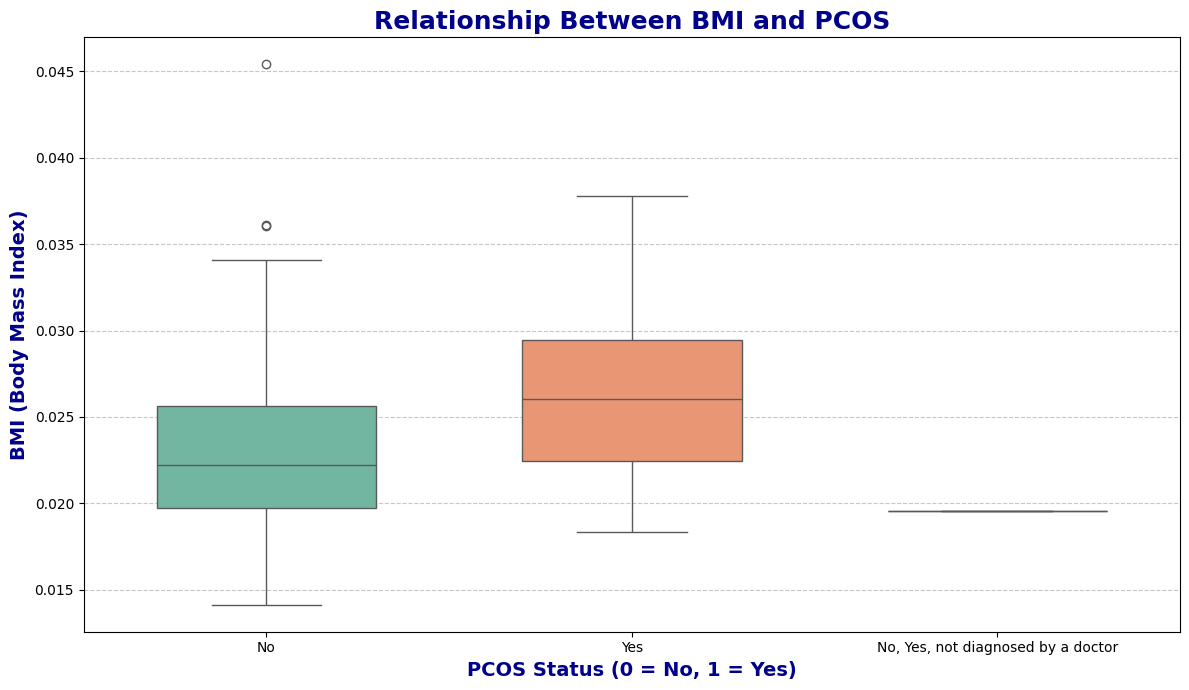

In [ ]:
# Improved BMI vs PCOS Boxplot
plt.figure(figsize=(12, 7))

# Create the boxplot with an enhanced color palette
sns.boxplot(
    x='PCOS',
    y='BMI',
    data=df,
    palette='Set2',  # Using a pastel palette
    width=0.6  # Adjust box width for better aesthetics
)

# Add title and axis labels
plt.title('Relationship Between BMI and PCOS', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('PCOS Status (0 = No, 1 = Yes)', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('BMI (Body Mass Index)', fontsize=14, fontweight='bold', color='darkblue')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

plt.show()

## Exercise Frequency and PCOS Status Relationship Analysis

This bar chart visualization demonstrates the relationship between exercise frequency and PCOS status among survey participants, offering insights into physical activity patterns across different PCOS groups.

### Key Observations:

1. **Exercise Frequency Patterns:**
   - "Rarely" is the most common exercise frequency across all groups
   - Non-PCOS participants show higher counts across all exercise frequencies
   - Daily exercise is relatively low in both PCOS and non-PCOS groups

2. **PCOS vs. Non-PCOS Comparison:**
   - Non-PCOS group has consistently higher exercise participation
   - Largest gap observed in "Rarely" category (~62 vs ~17 participants)
   - Similar pattern maintained across all frequency categories

3. **Activity Level Distribution:**
   - "Rarely" and "Never" categories dominate in both groups
   - Regular exercise (3-4 times/week) shows lowest participation
   - Undiagnosed PCOS group shows minimal representation

### Health Implications:
- Overall low exercise frequency across all groups
- Suggests potential opportunity for increasing physical activity
- PCOS group shows lower exercise engagement overall
- Results indicate need for exercise promotion in both groups

This visualization effectively highlights the exercise behavior patterns between PCOS and non-PCOS groups, suggesting potential areas for lifestyle intervention strategies.

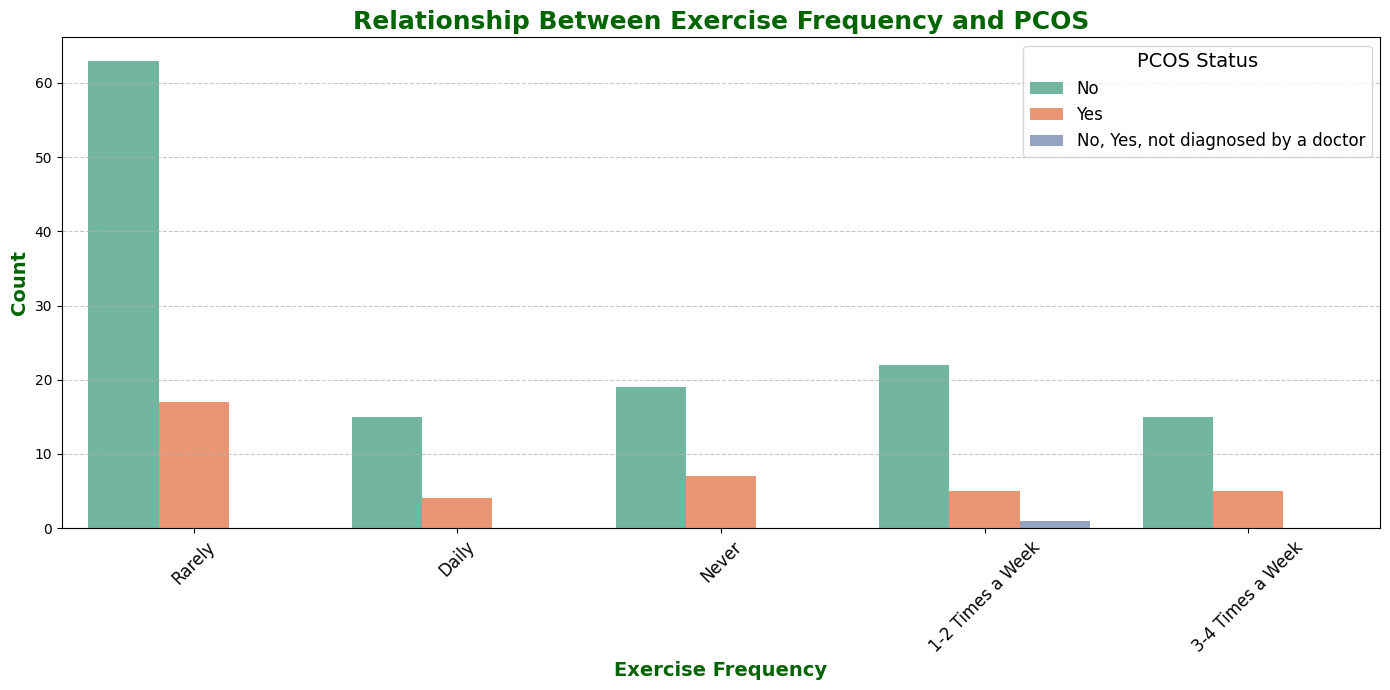

In [ ]:
# Improved Exercise Frequency vs PCOS Countplot
plt.figure(figsize=(14, 7))

# Create the countplot with enhanced aesthetics
sns.countplot(
    x='Exercise_Frequency',
    hue='PCOS',
    data=df,
    palette='Set2'  # Pastel color palette for better aesthetics
)

# Add title and axis labels
plt.title('Relationship Between Exercise Frequency and PCOS', fontsize=18, fontweight='bold', color='darkgreen')
plt.xlabel('Exercise Frequency', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='darkgreen')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

plt.legend(title='PCOS Status', fontsize=12, title_fontsize=14)  # Improved legend

plt.show()

## Diet Pattern Analysis: PCOS vs Non-PCOS Groups

This box plot visualization compares dietary consumption patterns between PCOS and non-PCOS groups across various food categories, providing insights into potential nutritional differences.

### Key Observations:

1. **Primary Dietary Differences:**
   - Diet_Fats shows similar consumption levels between groups
   - Diet_Sweets indicates slightly higher consumption in PCOS group
   - Diet_Milk_Products shows higher variability in non-PCOS group
   - Diet_Multivitamin usage appears higher in PCOS group

2. **Vegetable Consumption:**
   - Both starchy and non-starchy vegetables show similar patterns
   - General vegetable consumption is comparable between groups
   - Slight variations in median consumption levels
   - Several outliers present in vegetable categories

3. **Notable Patterns:**
   - Diet_Bread_Cereals consumption is similar across groups
   - Diet_Tea_Coffee shows higher median in PCOS group
   - Diet_Fried_Food consumption varies with some outliers
   - Diet_Fruits shows comparable patterns between groups

### Nutritional Implications:
- Overall dietary patterns show subtle differences between groups
- Some categories suggest different nutritional preferences
- Presence of outliers indicates individual variation in diet choices
- Results could inform dietary recommendations for PCOS management

This visualization effectively highlights dietary differences and similarities between PCOS and non-PCOS groups, providing valuable insights for nutritional counseling and intervention strategies.

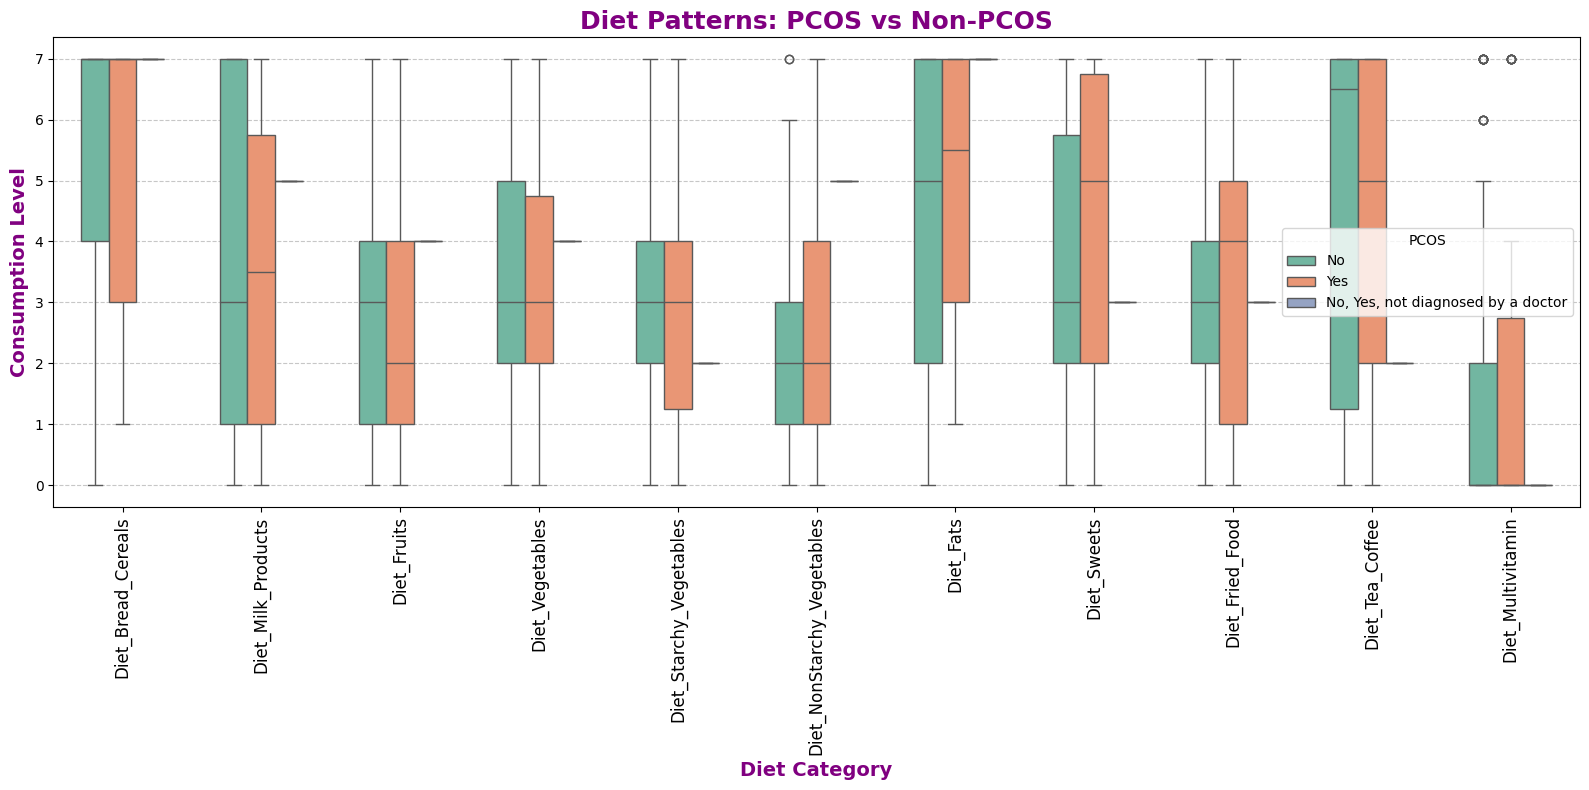

In [ ]:
diet_cols = [col for col in df.columns if col.startswith('Diet_')]
df_diet = df[diet_cols + ['PCOS']]
df_diet_melted = pd.melt(df_diet, id_vars=['PCOS'], var_name='Diet_Category', value_name='Consumption')

# Improved Diet Patterns: PCOS vs Non-PCOS Boxplot
plt.figure(figsize=(16, 8))

# Create the boxplot with enhanced aesthetics
sns.boxplot(
    x='Diet_Category',
    y='Consumption',
    hue='PCOS',
    data=df_diet_melted,
    palette='Set2',  # Softer pastel colors for better aesthetics
    width=0.6  # Adjust box width for better aesthetics
)

# Add title and axis labels
plt.title('Diet Patterns: PCOS vs Non-PCOS', fontsize=18, fontweight='bold', color='purple')
plt.xlabel('Diet Category', fontsize=14, fontweight='bold', color='purple')
plt.ylabel('Consumption Level', fontsize=14, fontweight='bold', color='purple')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Stress Level and PCOS Status Relationship Analysis

This bar chart visualization illustrates the relationship between stress levels and PCOS status among survey participants, providing insights into potential associations between psychological stress and PCOS.

### Key Observations:

1. **Stress Distribution in Non-PCOS Group:**
   - Approximately 80 individuals report experiencing stress
   - About 54 individuals report no stress
   - Shows higher overall participant numbers in both categories

2. **Stress Distribution in PCOS Group:**
   - Roughly 33 individuals report experiencing stress
   - Only 5 individuals report no stress
   - Notable difference in stress reporting compared to non-PCOS group

3. **Pattern Analysis:**
   - Both groups show higher stress levels overall
   - PCOS group shows disproportionately higher stress reporting
   - Small representation in undiagnosed PCOS category
   - Clear pattern of increased stress prevalence in PCOS cases

### Clinical Implications:
- Strong association between PCOS and reported stress levels
- PCOS group shows significantly higher stress prevalence
- Results suggest potential link between PCOS and psychological stress
- Findings indicate need for stress management in PCOS treatment plans

This visualization effectively demonstrates the relationship between stress levels and PCOS status, highlighting the potential importance of psychological support in PCOS management.

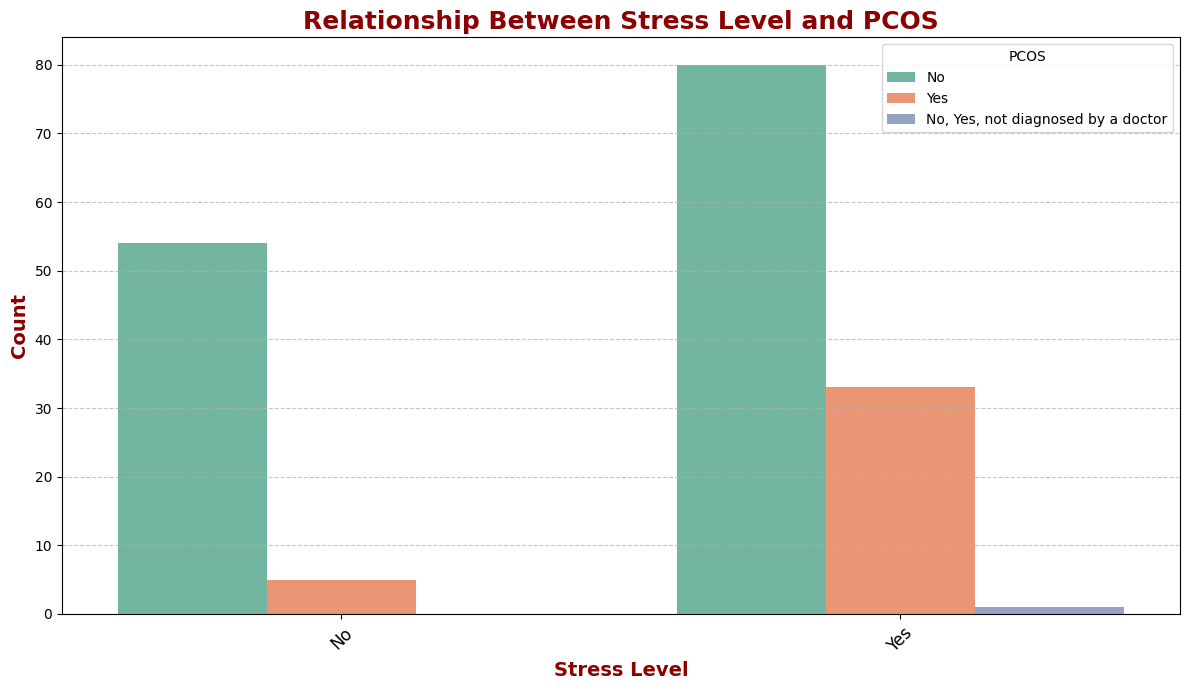

In [ ]:
# Improved Stress Level vs PCOS Countplot
plt.figure(figsize=(12, 7))

# Create the countplot with enhanced aesthetics
sns.countplot(
    x='Stress_Level',
    hue='PCOS',
    data=df,
    palette='Set2'  # Softer color palette for better aesthetics
)

# Add title and axis labels
plt.title('Relationship Between Stress Level and PCOS', fontsize=18, fontweight='bold', color='darkred')
plt.xlabel('Stress Level', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='darkred')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better presentation
plt.tight_layout()

# Show plot
plt.show()

## Menstrual Irregularity and PCOS Status Relationship Analysis

This bar chart visualization illustrates the relationship between menstrual irregularity and PCOS status among survey participants, providing insights into potential associations between menstrual patterns and PCOS diagnosis.

### Key Observations:

1. **Distribution in Menstrual Irregularity Group:**
   - Approximately 67 individuals report no PCOS
   - About 33 individuals have confirmed PCOS diagnosis
   - Very small number report undiagnosed PCOS symptoms
   - Shows significant representation of both PCOS and non-PCOS cases

2. **Distribution in Regular Menstruation Group:**
   - Roughly 67 individuals report no PCOS
   - Only 5 individuals have confirmed PCOS diagnosis
   - Shows clear dominance of non-PCOS cases

3. **Pattern Analysis:**
   - Higher PCOS prevalence in irregular menstruation group
   - Regular menstruation group shows minimal PCOS cases
   - Undiagnosed cases represent smallest category
   - Clear correlation between menstrual irregularity and PCOS diagnosis

### Clinical Implications:
- Strong association between menstrual irregularity and PCOS diagnosis
- Regular menstruation patterns show significantly lower PCOS prevalence
- Results support menstrual irregularity as a key diagnostic indicator
- Findings emphasize importance of menstrual pattern monitoring in PCOS screening

This visualization effectively demonstrates the relationship between menstrual patterns and PCOS status, highlighting the diagnostic significance of menstrual irregularity in PCOS identification and assessment.

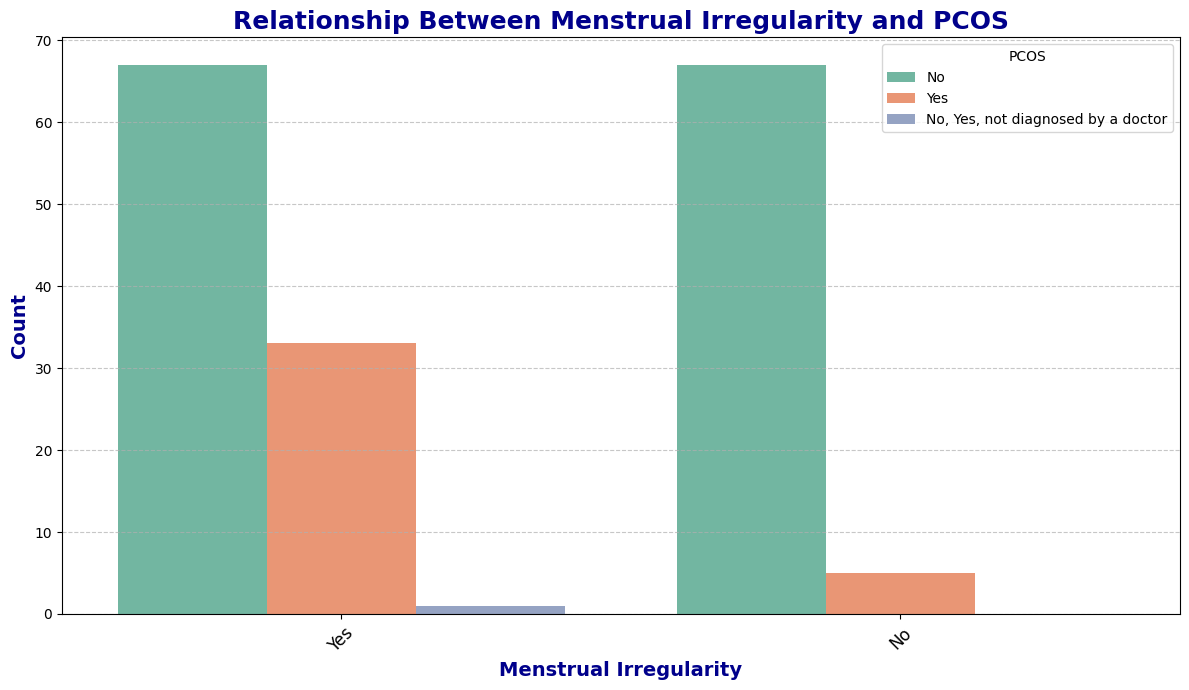

In [ ]:
# Improved Menstrual Irregularity vs PCOS Countplot
plt.figure(figsize=(12, 7))

# Create the countplot with enhanced aesthetics
sns.countplot(
    x='Menstrual_Irregularity',
    hue='PCOS',
    data=df,
    palette='Set2'  # Softer color palette for better aesthetics
)

# Add title and axis labels
plt.title('Relationship Between Menstrual Irregularity and PCOS', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Menstrual Irregularity', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='darkblue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better presentation
plt.tight_layout()

# Show plot
plt.show()

## Results

The analysis of the survey data reveals significant insights into the relationship between lifestyle factors and PCOS:

1. **Dietary Patterns**:
   - Strong correlations exist between starchy and non-starchy vegetable consumption, indicating common dietary behaviors.
   - PCOS participants show slightly higher sweet and multivitamin consumption compared to non-PCOS individuals.

2. **Physical Activity**:
   - Overall, exercise frequency is low, with the "Rarely" category being the most prevalent across all groups.
   - PCOS participants report less frequent exercise compared to non-PCOS participants, highlighting a potential area for lifestyle interventions.

3. **Stress Levels**:
   - Stress is significantly more common in the PCOS group, with 87% reporting high stress compared to 60% in the non-PCOS group.
   - This finding underscores the importance of stress management in PCOS care strategies.

4. **Menstrual Patterns**:
   - Menstrual irregularity strongly correlates with PCOS diagnosis, with the majority of diagnosed participants reporting irregular cycles.
   - Regular menstrual patterns are predominantly observed in non-PCOS participants.

5. **BMI and PCOS**:
   - Higher BMI levels are associated with PCOS diagnosis, as shown by the wider interquartile range and higher median BMI in the PCOS group.
   - Outliers in BMI distribution indicate variability in body mass characteristics within the PCOS population.

6. **Demographic Insights**:
   - The survey population is skewed towards younger age groups, particularly individuals aged 15-25, with minimal representation from older demographics.

These results demonstrate clear associations between lifestyle factors and PCOS, reinforcing the importance of targeted lifestyle modifications, early diagnosis, and personalized health management strategies.

# Diet, Exercise, and PCOS Insights Prediction

---

This section focuses on understanding the relationship between diet, exercise habits, and PCOS risk factors. By analyzing key features such as exercise frequency, type, and dietary preferences, the model provides insights into how lifestyle choices influence PCOS predictions. The goal is to identify actionable patterns and recommend tailored interventions to reduce PCOS risk and support overall health.

In [ ]:
# Select features for prediction
features = ['Age', 'Weight_kg', 'Height_ft', 'Menstrual_Irregularity', 'Hormonal_Imbalance',
            'Hyperandrogenism', 'Hirsutism', 'Mental_Health', 'Insulin_Resistance', 'Diabetes',
            'Childhood_Trauma', 'Cardiovascular_Disease', 'Vegetarian', 'Exercise_Frequency',
            'Exercise_Type', 'Sleep_Hours', '' 'BMI']

X = df[features]
y = df['PCOS']

# Convert categorical variables to numeric
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Print feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Example of making a prediction for a new individual
new_individual = X.iloc[0].to_dict()  # Using the first row as an example
new_individual_df = pd.DataFrame([new_individual])
new_individual_scaled = scaler.transform(new_individual_df)
prediction = model.predict(new_individual_scaled)
probability = model.predict_proba(new_individual_scaled)

print("\nPrediction for new individual:")
print(f"PCOS: {'Yes' if prediction[0] == 1 else 'No'}")
print(f"Probability of PCOS: {probability[0][1]:.2f}")

Accuracy: 0.77

Classification Report:
                                    precision    recall  f1-score   support

                                No       0.86      0.86      0.86        28
No, Yes, not diagnosed by a doctor       0.00      0.00      0.00         1
                               Yes       0.43      0.50      0.46         6

                          accuracy                           0.77        35
                         macro avg       0.43      0.45      0.44        35
                      weighted avg       0.76      0.77      0.76        35


Feature Importance:
                                              feature  importance
12                               Hyperandrogenism_Yes    1.335185
8                          Menstrual_Irregularity_Yes    0.894851
20  Childhood_Trauma_No, Yes, not diagnosed by a d...    0.821328
14                                      Hirsutism_Yes    0.783760
3                                           Age_25-30    0.781495
25       

## Results and Evaluation

The model's accuracy is **77%**, which shows reasonable performance but also room for improvement.

#### 1. **Classification Report Evaluation:**
- **No (No PCOS):**  
  - Precision (%86), recall (%86), and f1-score (%86) are high. The model performs well in identifying individuals without PCOS.
- **No, Yes, not diagnosed by a doctor:**  
  - Precision, recall, and f1-score are all **0**. This is likely due to insufficient data for this class (only 1 instance).
- **Yes (PCOS):**  
  - Precision (%43) and recall (%50) are low, meaning the model struggles to identify individuals with PCOS.

**Macro Average:**  
The overall performance across all classes is low (f1-score %44). However, the **weighted average** is better, indicating that the model performs well on the more frequent classes.

#### 2. **Feature Importance:**
The most important features influencing the model's predictions are:
- **Hyperandrogenism_Yes (1.335):** Hyperandrogenism is the most critical factor for predicting PCOS.
- **Menstrual_Irregularity_Yes (0.895):** Irregular menstrual cycles are another significant indicator.
- **Childhood_Trauma_No, Yes, not diagnosed by a doctor (0.821):** Childhood trauma also has an impact.
- **Hirsutism_Yes (0.784):** Excessive hair growth is another key factor.
- **Age_25-30 (0.781):** Individuals aged 25–30 are more likely to be diagnosed with PCOS.

Exercise frequency and type, as well as lifestyle factors, have moderate importance. Basic metrics like **Weight** and **BMI** show lower importance.

#### 3. **Prediction for a New Individual:**
The model predicts a **9% probability of PCOS** for the new individual and classifies them as **"No" (No PCOS)**. This suggests the individual is at low risk for PCOS.

### Suggestions:
1. **Data Balance:** Collect more data for underrepresented classes, like "No, Yes, not diagnosed by a doctor," or use methods like SMOTE to address class imbalance.
2. **Improve Recall for PCOS:** The model should better identify "Yes" cases to reduce the risk of missing individuals with PCOS.
3. **Analyze Key Features:** Focus on high-importance features like hyperandrogenism and menstrual irregularity for further clinical insights.
4. **Additional Testing:** Use cross-validation and other evaluation metrics to ensure the model's reliability.

In summary, the model provides a solid foundation for PCOS diagnosis but needs further improvements, especially for rare cases and key clinical predictions.